##### Imports

In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

import sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels 
import statsmodels.api as sm

from sklearn.metrics import r2_score

##### Data Inspection

In [368]:
data = pd.read_csv('Flipkart Mobile - 2.csv')
data

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77


In [369]:
data.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [370]:
data.tail()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77
429,Xiaomi,Redmi 6 Pro,Blue,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,8190,0.36,1.53


In [371]:
shape=data.shape
print('The shape of data is {}'.format(shape))

The shape of data is (430, 16)


In [372]:
size=data.size
print('The size of data is {}'.format(size))

The size of data is 6880


In [373]:
ndim=data.ndim
print('The ndim of data is {}'.format(ndim))

The ndim of data is 2


In [374]:
data.index

RangeIndex(start=0, stop=430, step=1)

In [375]:
data.columns

Index(['brand', 'model', 'base_color', 'processor', 'screen_size', 'ROM',
       'RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')

In [376]:
data.describe()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,105.748837,5.320930,6.369767,2.904651,1.044186,4529.397674,4.339302,23567.944186,25433.234884,0.108000,29.752326
std,63.164064,2.182635,0.369549,0.952350,0.227280,986.907252,0.151494,56096.277784,22471.926588,0.073432,58.399588
min,8.000000,1.000000,4.700000,1.000000,1.000000,1800.000000,3.000000,4.000000,5742.000000,0.010000,0.000000
25%,64.000000,4.000000,6.300000,2.000000,1.000000,4000.000000,4.300000,745.000000,11999.000000,0.060000,1.640000
50%,128.000000,4.000000,6.500000,3.000000,1.000000,4500.000000,4.300000,5197.500000,16989.500000,0.090000,9.655000
75%,128.000000,6.000000,6.500000,4.000000,1.000000,5000.000000,4.400000,21089.250000,28999.000000,0.160000,29.717500
max,512.000000,12.000000,7.600000,4.000000,3.000000,7000.000000,4.600000,642373.000000,157999.000000,0.440000,550.190000


In [377]:
data.head(1)

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52


In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

##### Null Values

In [379]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()>0]

In [380]:
features_with_na

[]

##### Numericals

In [381]:
numerical_features =[feature for feature in data.columns if data[feature].dtypes !='O']
print('Number of numerical variables :',len(numerical_features))

Number of numerical variables : 11


In [382]:
data[numerical_features].head()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [383]:
discrete_features = [feature for feature in numerical_features if len(data[feature].unique())<25]  
print('Discrete variables count {}'.format(len(discrete_features)))

Discrete variables count 6


In [384]:
data[discrete_features].head()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,ratings
0,64,2,4.7,1,1,4.5
1,64,4,5.4,2,1,4.5
2,64,2,4.7,1,1,4.5
3,64,3,6.1,1,1,4.6
4,128,4,6.1,2,1,4.6


In [385]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print('Continuous feature count {}'.format(len(continuous_features)))

Continuous feature count 5


In [386]:
data[continuous_features].head()

,battery_capacity,num_of_ratings,sales_price,discount_percent,sales
0,1800,38645,32999,0.17,127.52
1,2815,244,57149,0.04,1.39
2,1800,38645,32999,0.17,127.52
3,2942,5366,42999,0.10,23.07
4,2815,745,69149,0.02,5.15


##### Relationship with Dependent Features

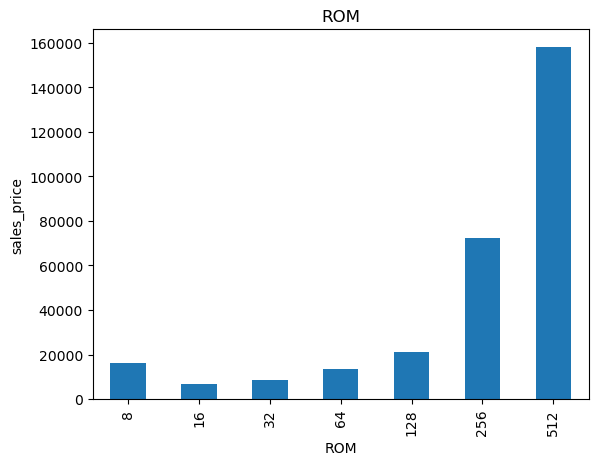

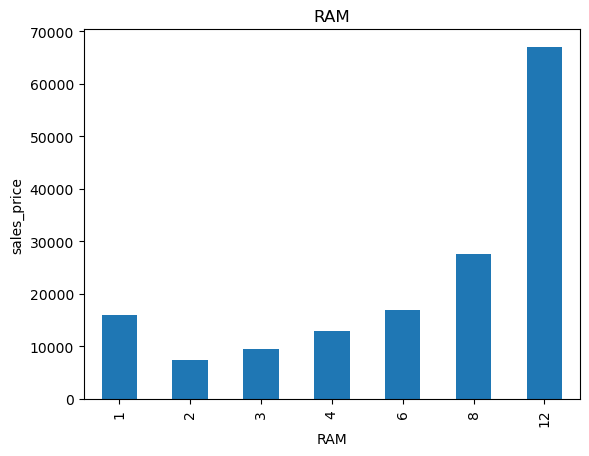

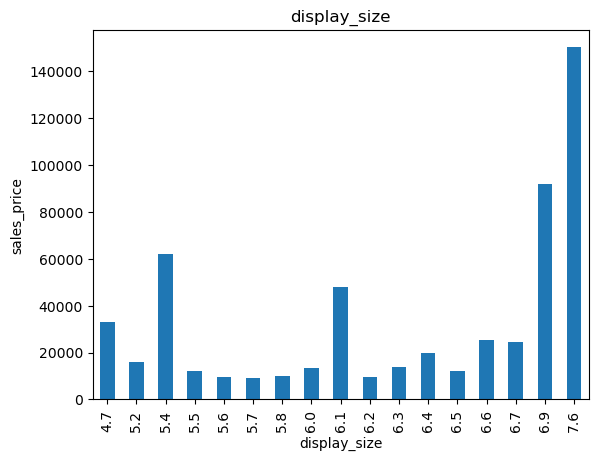

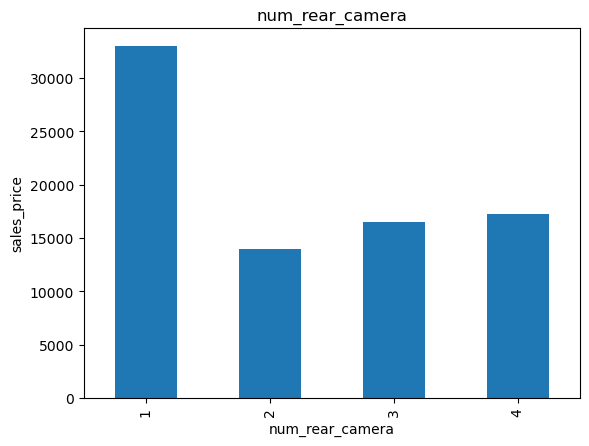

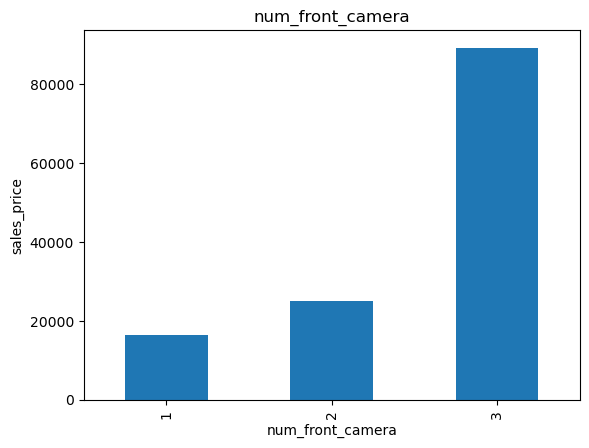

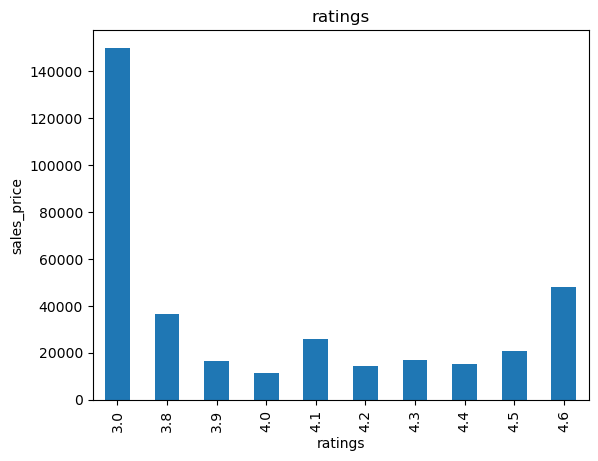

In [387]:
for feature in discrete_features:
    data=data.copy()
    data.groupby(feature)['sales_price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('sales_price')
    plt.title(feature)
    plt.show()

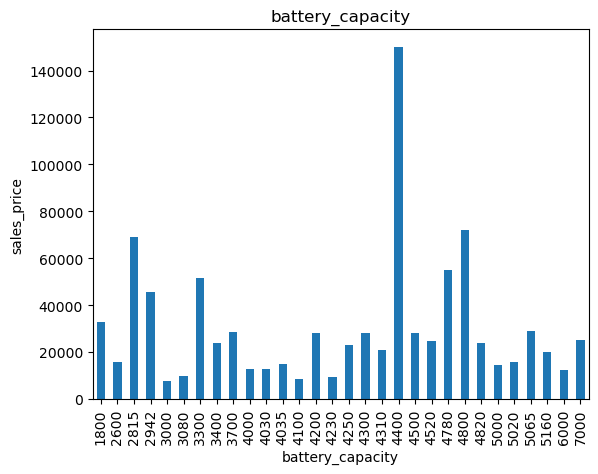

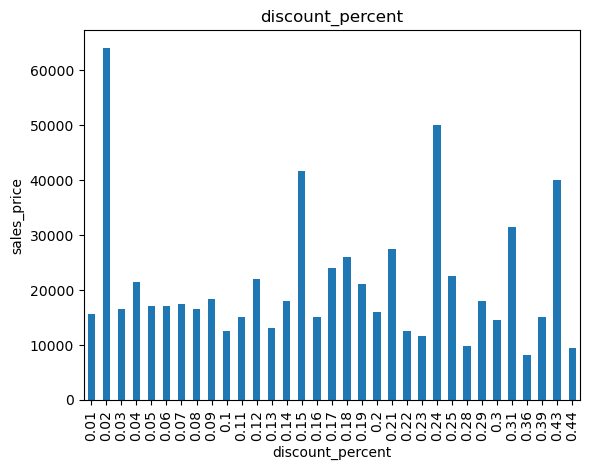

In [388]:
continuous_features1 = ['battery_capacity','discount_percent']
for feature in continuous_features1:
    data=data.copy()
    data.groupby(feature)['sales_price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('sales_price')
    plt.title(feature)
    plt.show()

##### Count

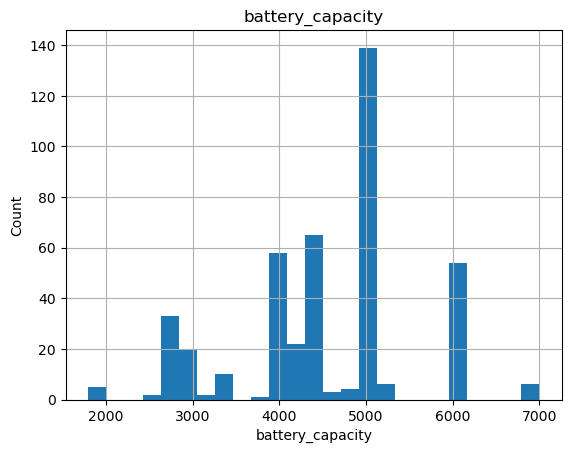

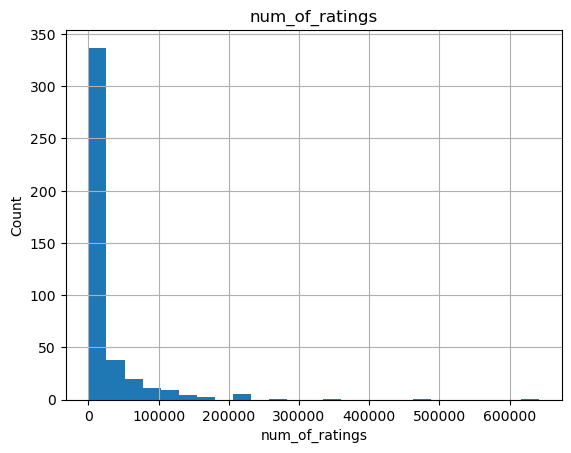

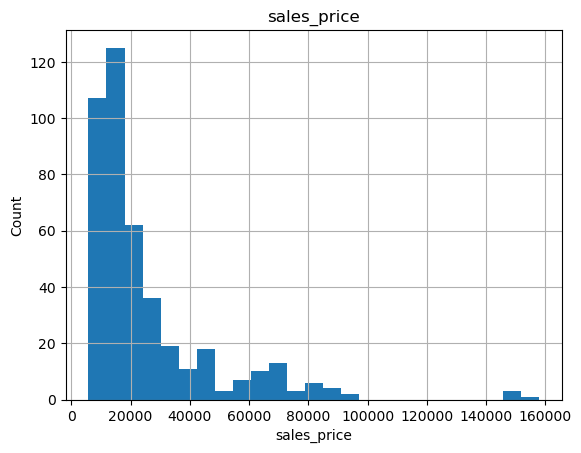

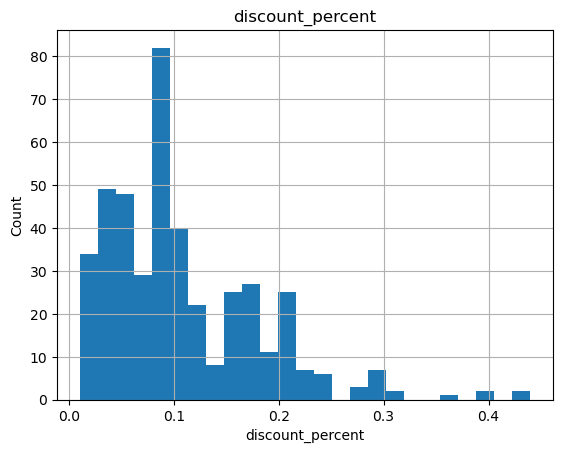

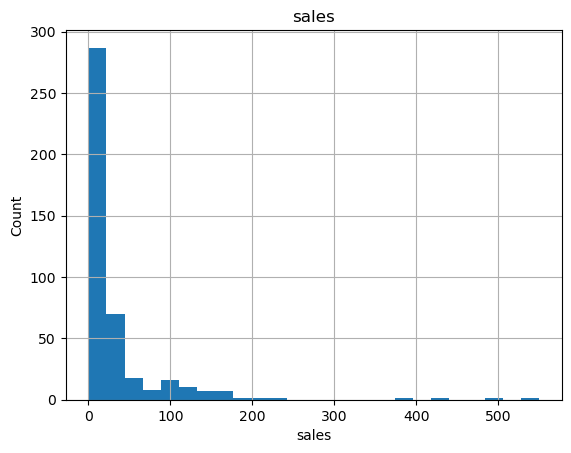

In [389]:
for feature in continuous_features :
    data=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

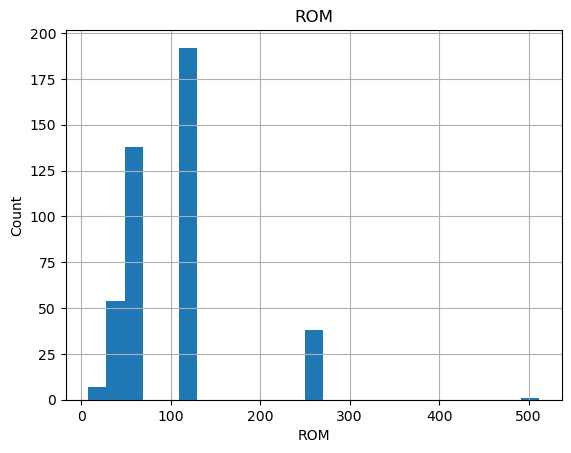

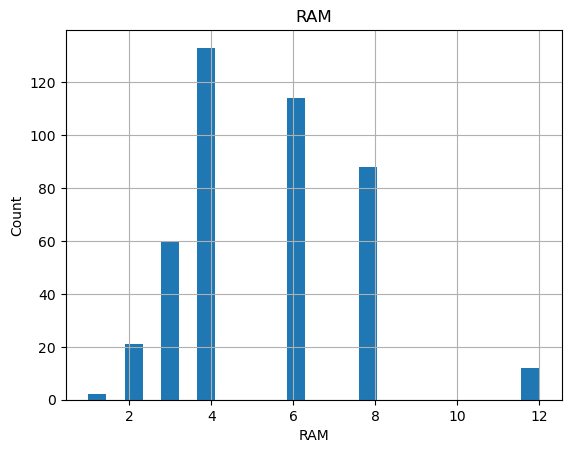

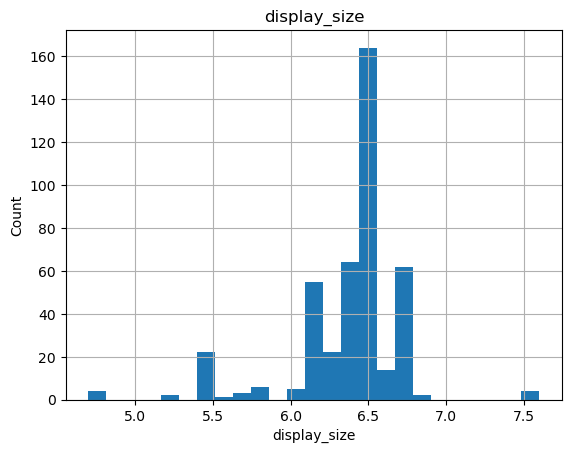

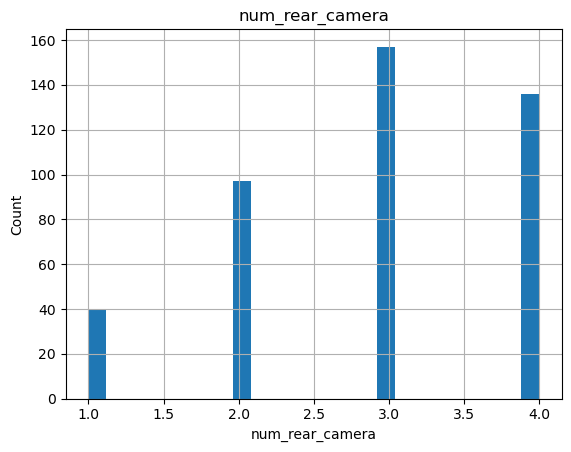

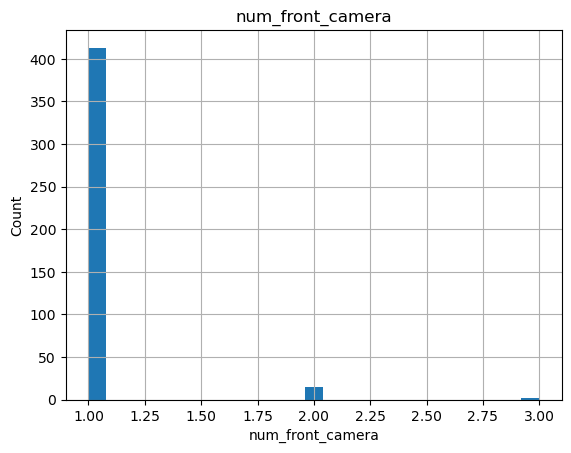

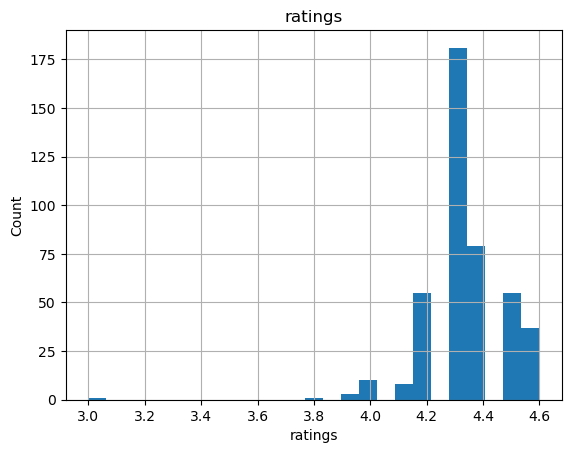

In [390]:
for feature in discrete_features :
    data=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

##### Skewness for Outlier Handling

<Axes: xlabel='ratings', ylabel='Density'>

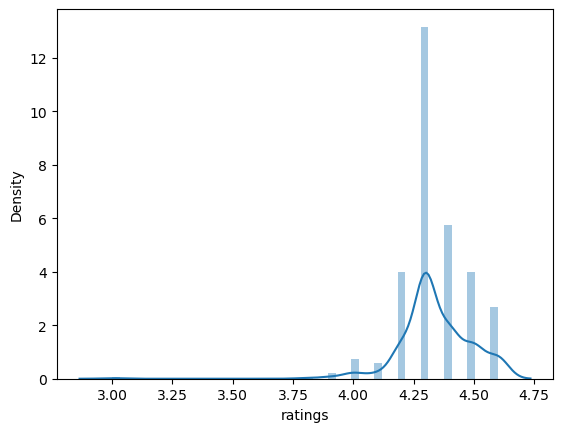

In [391]:
sns.distplot(data['ratings'])

In [392]:
data = data.drop('ratings', axis=1)

<Axes: xlabel='num_front_camera', ylabel='Density'>

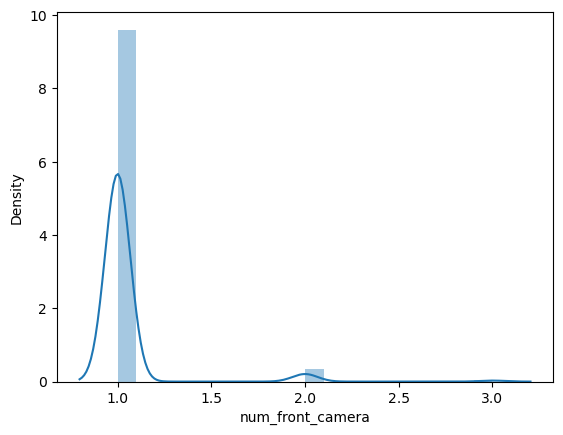

In [393]:
sns.distplot(data['num_front_camera'])

In [394]:
data['num_front_camera'].describe()

count    430.000000
mean       1.044186
std        0.227280
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: num_front_camera, dtype: float64

In [395]:
import numpy as np

data['num_front_camera'] = np.log(data['num_front_camera'])


<Axes: xlabel='display_size', ylabel='Density'>

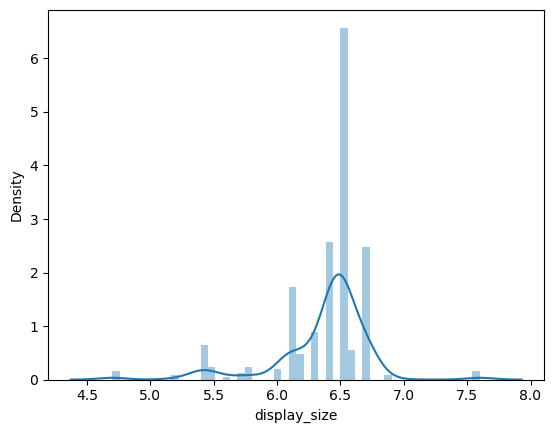

In [396]:
sns.distplot(data['display_size'])

In [397]:
data = data.drop('display_size', axis=1)

<Axes: xlabel='sales', ylabel='Density'>

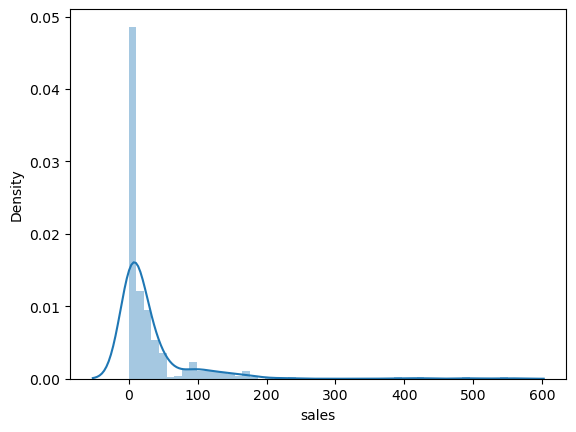

In [398]:
sns.distplot(data['sales'])

In [399]:
data = data.drop('sales', axis=1)

<Axes: xlabel='num_rear_camera', ylabel='Density'>

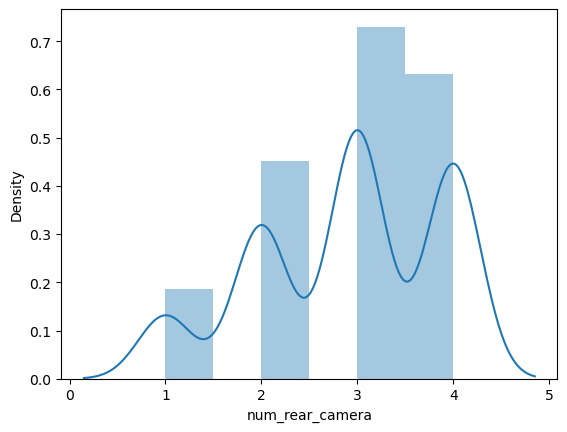

In [400]:
sns.distplot(data['num_rear_camera'])

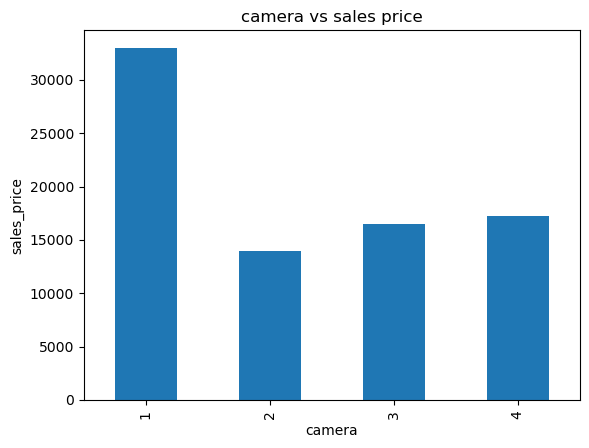

In [401]:
data.groupby('num_rear_camera')['sales_price'].median().plot.bar()
plt.xlabel('camera')
plt.ylabel('sales_price')
plt.title('camera vs sales price')
plt.show()

<Axes: xlabel='discount_percent', ylabel='Density'>

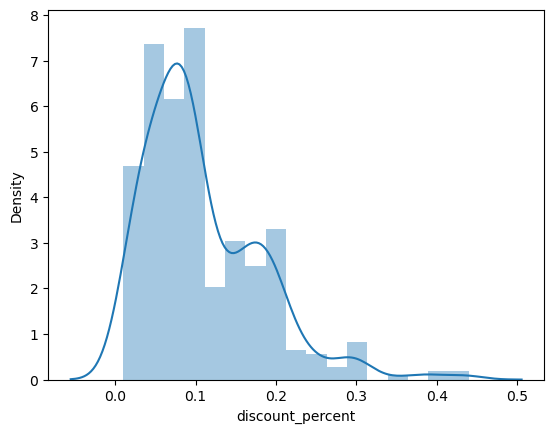

In [402]:
sns.distplot(data['discount_percent'])

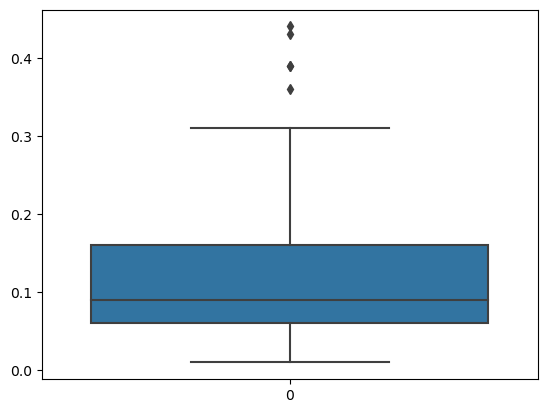

In [403]:
sns.boxplot(data['discount_percent'])
plt.show()

In [404]:
q25 = data['discount_percent'].quantile(0.25)
q75 = data['discount_percent'].quantile(0.75)

In [405]:
iqr = q75 - q25

upper_limit = q75 + 1.5 * iqr
lower_limit = q25 - 1.5 * iqr

In [406]:
upper_limit

0.31000000000000005

In [407]:
lower_limit

-0.09000000000000002

In [408]:
new_df = data[data['discount_percent'] < upper_limit]
new_df.shape

(425, 13)

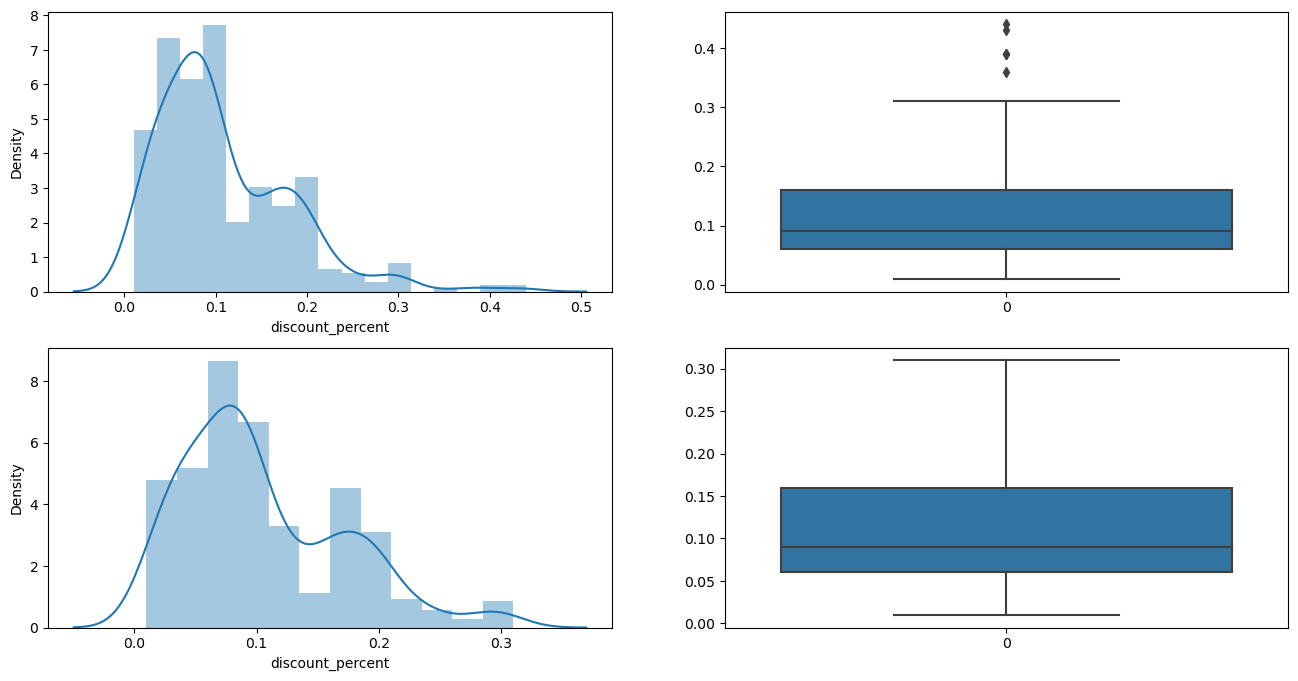

In [409]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['discount_percent'])
plt.subplot(2,2,2)
sns.boxplot(data['discount_percent'])
plt.subplot(2,2,3)
sns.distplot(new_df['discount_percent'])
plt.subplot(2,2,4)
sns.boxplot(new_df['discount_percent'])
plt.show()

In [410]:
new_df_cap = data.copy()
new_df_cap['discount_percent'] = np.where(
    new_df_cap['discount_percent'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['discount_percent'] < lower_limit,
        lower_limit,
        new_df_cap['discount_percent']))

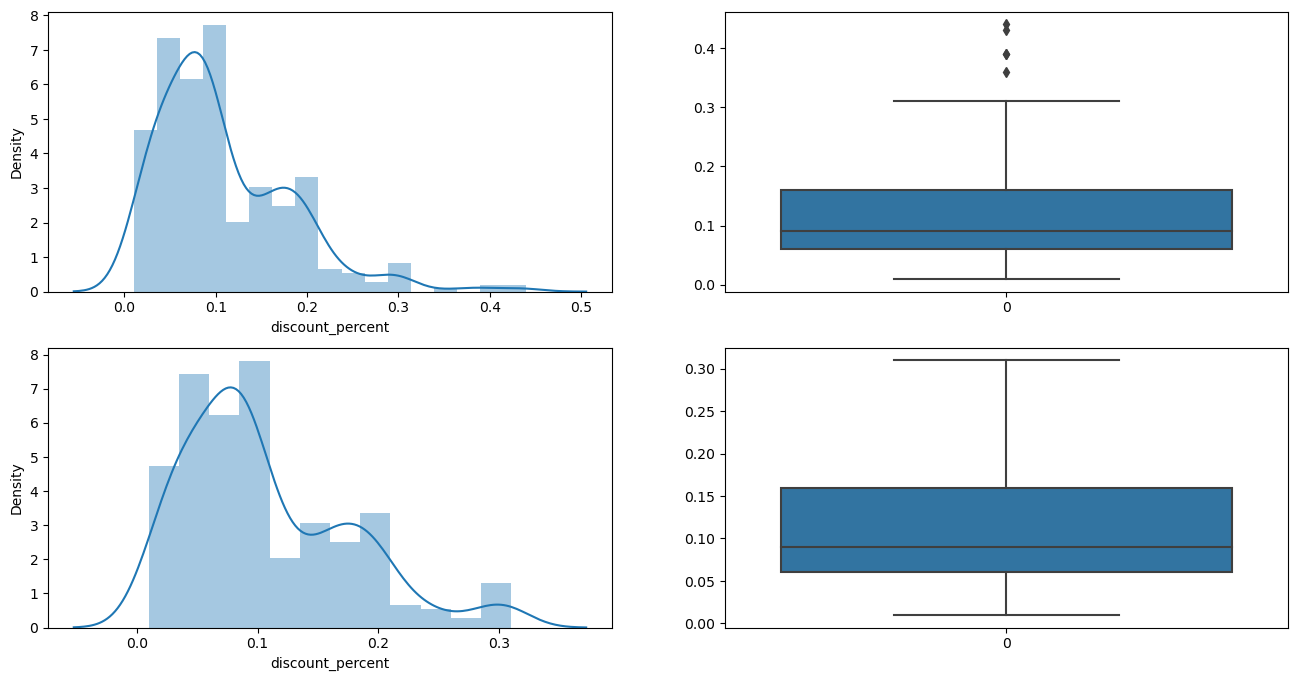

In [411]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['discount_percent'])
plt.subplot(2,2,2)
sns.boxplot(data['discount_percent'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['discount_percent'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['discount_percent'])
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'ROM'),
  Text(1, 0, 'RAM'),
  Text(2, 0, 'num_rear_camera'),
  Text(3, 0, 'num_front_camera'),
  Text(4, 0, 'battery_capacity'),
  Text(5, 0, 'num_of_ratings'),
  Text(6, 0, 'sales_price'),
  Text(7, 0, 'discount_percent')])

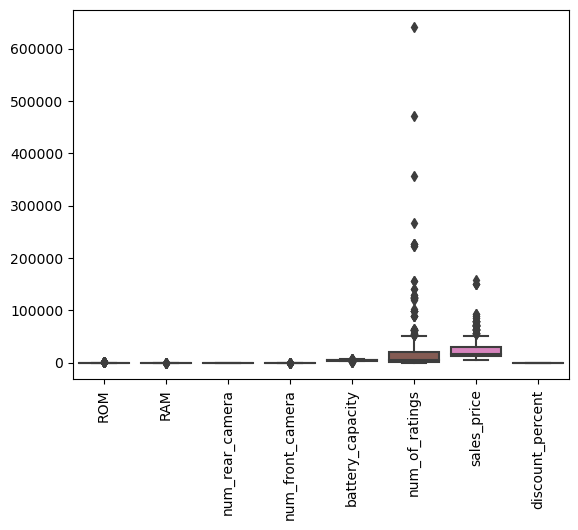

In [412]:
sns.boxplot(new_df_cap)
plt.xticks(rotation=90)

In [413]:
new_df_cap = new_df_cap.drop('num_of_ratings', axis=1)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'ROM'),
  Text(1, 0, 'RAM'),
  Text(2, 0, 'num_rear_camera'),
  Text(3, 0, 'num_front_camera'),
  Text(4, 0, 'battery_capacity'),
  Text(5, 0, 'sales_price'),
  Text(6, 0, 'discount_percent')])

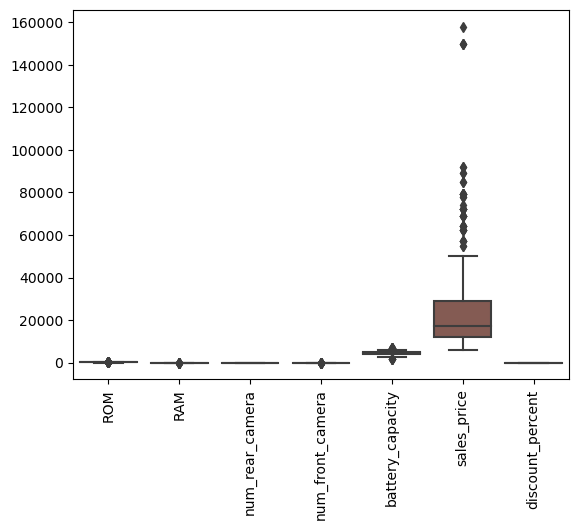

In [414]:
sns.boxplot(new_df_cap)
plt.xticks(rotation=90)

<Axes: xlabel='battery_capacity', ylabel='Density'>

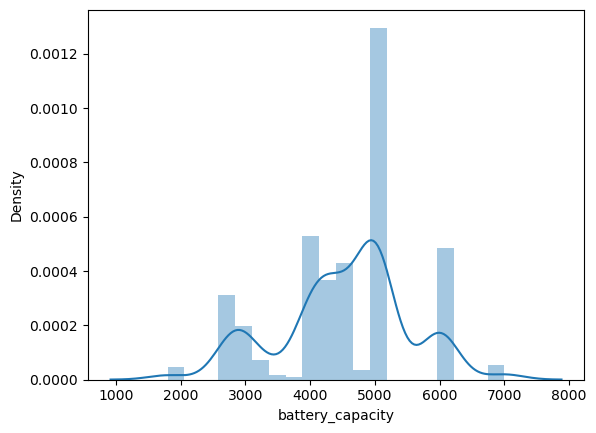

In [415]:
sns.distplot(new_df_cap['battery_capacity'])

In [416]:
new_df_cap['battery_capacity'].describe()

count     430.000000
mean     4529.397674
std       986.907252
min      1800.000000
25%      4000.000000
50%      4500.000000
75%      5000.000000
max      7000.000000
Name: battery_capacity, dtype: float64

<Axes: >

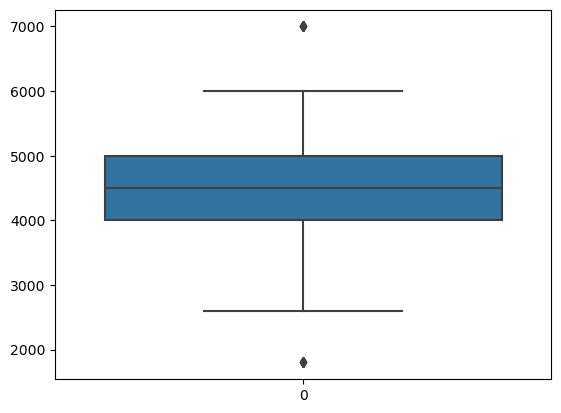

In [417]:
sns.boxplot(new_df_cap['battery_capacity'])

In [418]:
upper_limit = new_df_cap['battery_capacity'].quantile(0.99)
lower_limit = new_df_cap['battery_capacity'].quantile(0.01)

In [419]:
upper_limit

7000.0

In [420]:
lower_limit

2032.0

In [421]:
new_df_cap = new_df_cap[(new_df_cap['battery_capacity'] <= 7000.0) & (new_df_cap['battery_capacity'] >=2032.0)]

<Axes: xlabel='battery_capacity', ylabel='Density'>

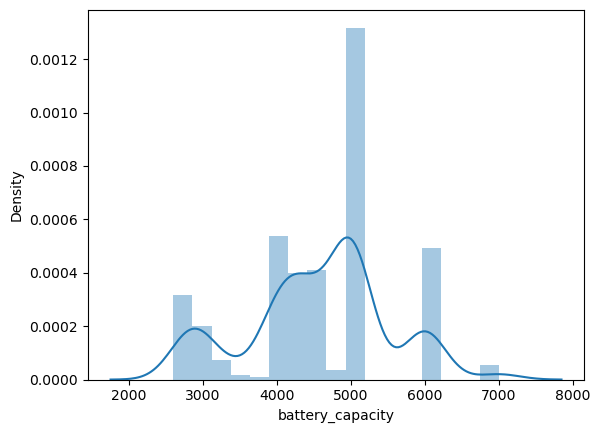

In [422]:
sns.distplot(new_df_cap['battery_capacity'])

In [423]:
new_df_cap['battery_capacity'] = np.where(new_df_cap['battery_capacity'] >= upper_limit,
        upper_limit,
        np.where(new_df_cap['battery_capacity'] <= lower_limit,
        lower_limit,
        new_df_cap['battery_capacity']))

<Axes: xlabel='battery_capacity', ylabel='Density'>

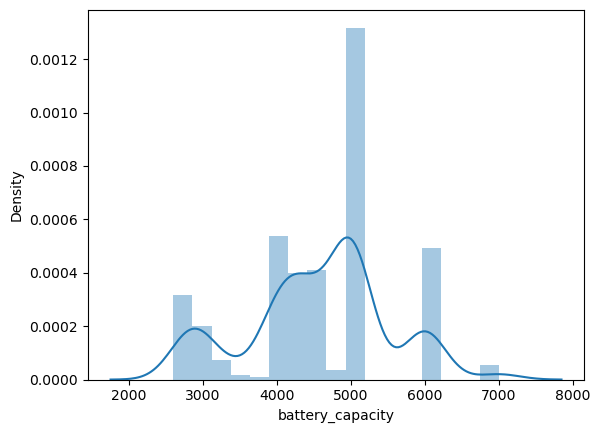

In [424]:
sns.distplot(new_df_cap['battery_capacity'])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'ROM'),
  Text(1, 0, 'RAM'),
  Text(2, 0, 'num_rear_camera'),
  Text(3, 0, 'num_front_camera'),
  Text(4, 0, 'battery_capacity'),
  Text(5, 0, 'sales_price'),
  Text(6, 0, 'discount_percent')])

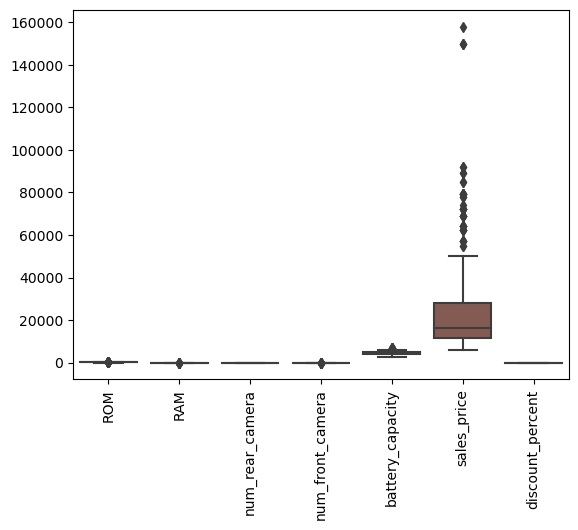

In [425]:
sns.boxplot(new_df_cap)
plt.xticks(rotation =90)

In [426]:
min(new_df_cap['battery_capacity'])

2600.0

<Axes: xlabel='sales_price', ylabel='Density'>

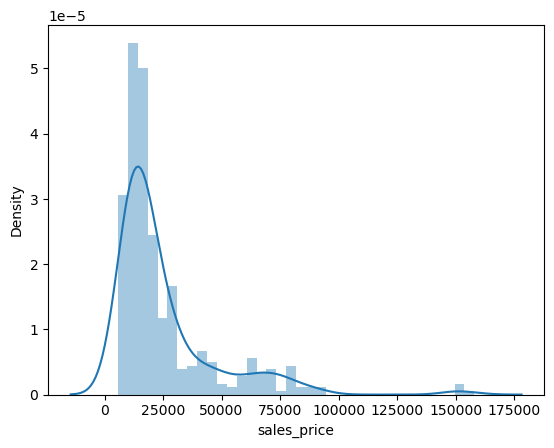

In [427]:
sns.distplot(new_df_cap['sales_price'])

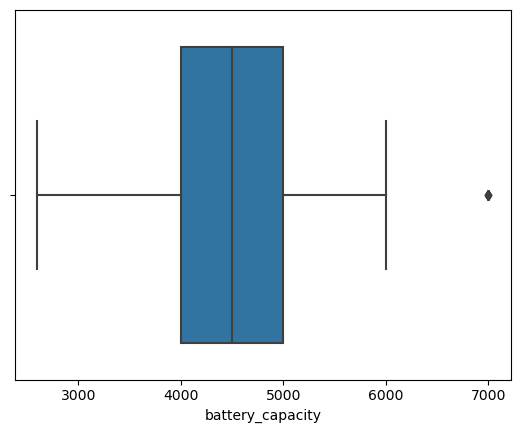

In [428]:
# Plot a box plot of 'battery_capacity'
sns.boxplot(data=new_df_cap, x='battery_capacity')

# Display the plot
plt.show()

In [429]:
percentile25 = new_df_cap['battery_capacity'].quantile(0.25)
percentile75 = new_df_cap['battery_capacity'].quantile(0.75)

In [430]:
percentile25

4000.0

In [431]:
percentile75

5000.0

In [432]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [433]:
new_df_cap[new_df_cap['battery_capacity'] > upper_limit]
new_df_cap[new_df_cap['battery_capacity'] < lower_limit]

,brand,model,base_color,processor,screen_size,ROM,RAM,num_rear_camera,num_front_camera,battery_capacity,sales_price,discount_percent
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,2,0.0,2815.0,57149,0.04
3,Apple,iPhone XR,Others,iOS,Medium,64,3,1,0.0,2942.0,42999,0.10
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,2,0.0,2815.0,69149,0.02
5,Apple,iPhone 12,Blue,Ceramic,Medium,64,4,2,0.0,2815.0,64149,0.02
6,Apple,iPhone 12,White,Ceramic,Medium,128,4,2,0.0,2815.0,69149,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...
367,Samsung,Galaxy S10,Black,Exynos,Medium,128,8,2,0.0,3400.0,39999,0.31
405,Xiaomi,Redmi Y2,Gold,Qualcomm,Medium,32,3,2,0.0,3080.0,9499,0.09
418,Xiaomi,Mi A1,Black,Qualcomm,Small,64,4,2,0.0,3080.0,10490,0.25
419,Xiaomi,Redmi 6A,Gold,MediaTek,Small,32,2,1,0.0,3000.0,5742,0.28


In [434]:
new_df_cap = new_df_cap[new_df_cap['battery_capacity'] < upper_limit]
new_df_cap.shape


(349, 12)

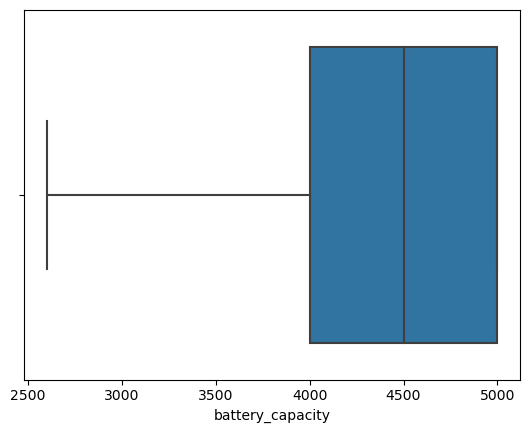

In [435]:
sns.boxplot(data=new_df_cap, x='battery_capacity')

# Display the plot
plt.show()


In [436]:
new_df_cap = new_df_cap.copy()
new_df_cap['battery_capacity'] = np.where(
    new_df_cap['battery_capacity'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['battery_capacity'] < lower_limit,
        lower_limit,
        new_df_cap['battery_capacity']))

<Axes: >

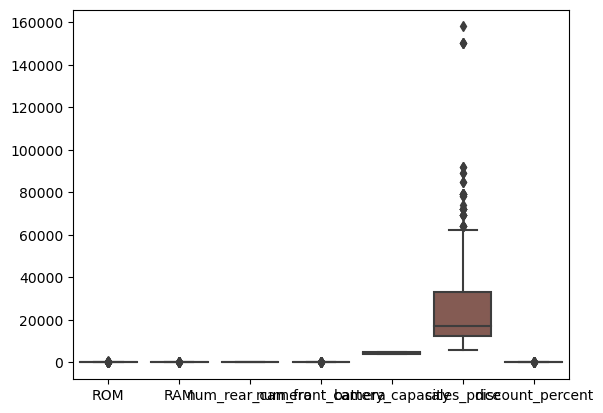

In [437]:
sns.boxplot(new_df_cap)

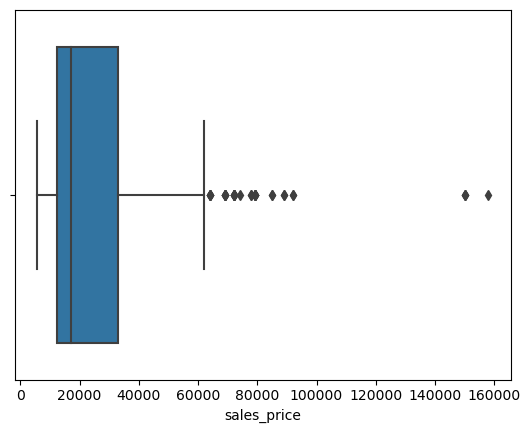

In [438]:
sns.boxplot(data=new_df_cap, x='sales_price')

# Display the plot
plt.show()

In [439]:
new_df_cap[(new_df_cap['brand']=='Samsung') & (new_df_cap['sales_price']> 100000)]

,brand,model,base_color,processor,screen_size,ROM,RAM,num_rear_camera,num_front_camera,battery_capacity,sales_price,discount_percent
303,Samsung,Galaxy Z Fold3 5G,Black,Qualcomm,Very Large,256,12,3,0.000000,4400.0,149999,0.12
309,Samsung,Galaxy Z Fold3 5G,Black,Qualcomm,Very Large,512,12,3,0.000000,4400.0,157999,0.12
310,Samsung,Galaxy Z Fold3 5G,Green,Qualcomm,Very Large,256,12,3,0.000000,4400.0,149999,0.12
328,Samsung,Galaxy Fold 2,Bronze,Qualcomm,Very Large,256,12,3,1.098612,4500.0,149999,0.21


In [440]:
new_df_cap = new_df_cap[new_df_cap['sales_price'] <= 140000]

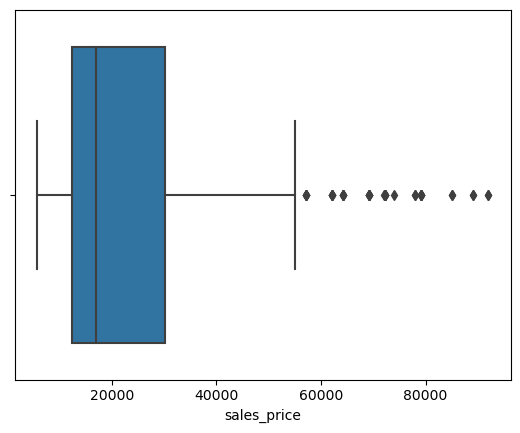

In [441]:
sns.boxplot(data=new_df_cap, x='sales_price')

# Display the plot
plt.show()

In [442]:
new_df_cap['sales_price'].describe()

count      345.000000
mean     25931.359420
std      20350.135754
min       5742.000000
25%      12349.000000
50%      16999.000000
75%      30149.000000
max      91999.000000
Name: sales_price, dtype: float64

In [443]:
group = new_df_cap.groupby('brand')['sales_price'].apply(lambda x: x > 80000)

In [444]:
grouped_true = group[group]
grouped_true

265    True
277    True
292    True
300    True
319    True
330    True
Name: sales_price, dtype: bool

<Axes: xlabel='sales_price', ylabel='Density'>

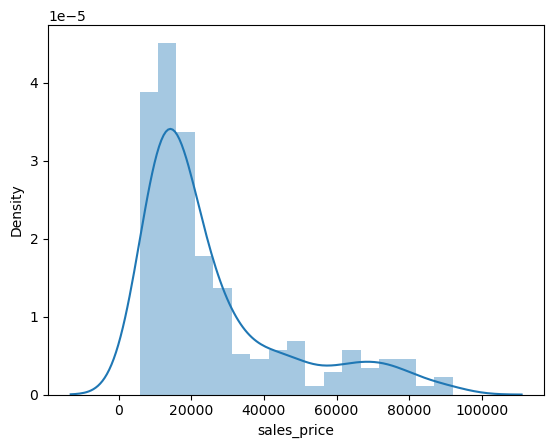

In [445]:
sns.distplot(new_df_cap['sales_price'])

In [446]:
percentile25 = new_df_cap['sales_price'].quantile(0.25)
percentile75 = new_df_cap['sales_price'].quantile(0.75)

In [447]:
percentile25

12349.0

In [448]:
percentile75

30149.0

In [449]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [450]:
upper_limit

30149.15

In [451]:
lower_limit

12348.85

In [452]:
new_df_cap[new_df_cap['sales_price'] > upper_limit]
new_df_cap[new_df_cap['sales_price'] < lower_limit]

,brand,model,base_color,processor,screen_size,ROM,RAM,num_rear_camera,num_front_camera,battery_capacity,sales_price,discount_percent
56,Poco,C3,Black,MediaTek,Large,64,4,3,0.0,5000.00,8999,0.18
58,Poco,M2 Reloaded,Blue,MediaTek,Large,64,4,4,0.0,5000.00,9999,0.16
59,Poco,C3,Blue,MediaTek,Large,32,3,3,0.0,5000.00,7999,0.20
61,Poco,C3,Black,MediaTek,Large,32,3,3,0.0,5000.00,7999,0.20
63,Poco,M2 Reloaded,Black,MediaTek,Large,64,4,4,0.0,5000.00,9999,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...
424,Xiaomi,Redmi 5,Blue,Qualcomm,Small,16,2,1,0.0,3999.85,6890,0.18
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,2,0.0,4000.00,7999,0.30
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,2,0.0,4000.00,9699,0.28
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,2,0.0,5000.00,8299,0.07


In [453]:
new_df_cap = new_df_cap[new_df_cap['sales_price'] < upper_limit]
new_df_cap.shape

(261, 12)

In [454]:
new_df_cap = new_df.copy()
new_df_cap['sales_price'] = np.where(
    new_df_cap['sales_price'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['sales_price'] < lower_limit,
        lower_limit,
        new_df_cap['sales_price']))

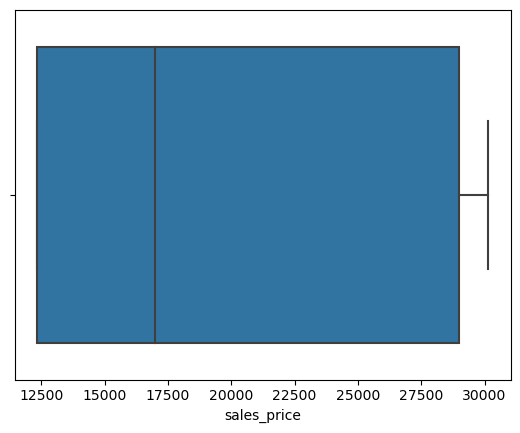

In [455]:
sns.boxplot(data=new_df_cap, x='sales_price')

# Display the plot
plt.show()

<Axes: xlabel='ROM'>

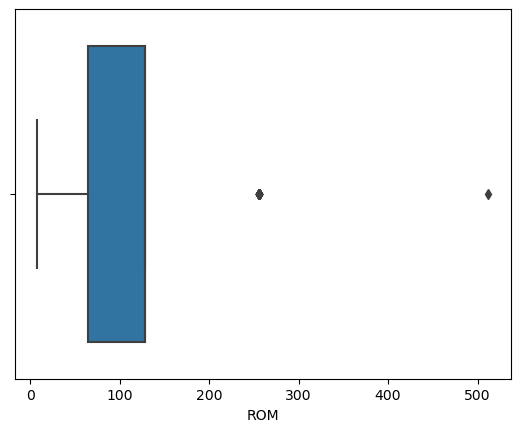

In [456]:
sns.boxplot(data=new_df_cap, x='ROM')

In [457]:
new_df_cap = new_df_cap[new_df_cap['ROM'] <= 250]

<Axes: xlabel='ROM'>

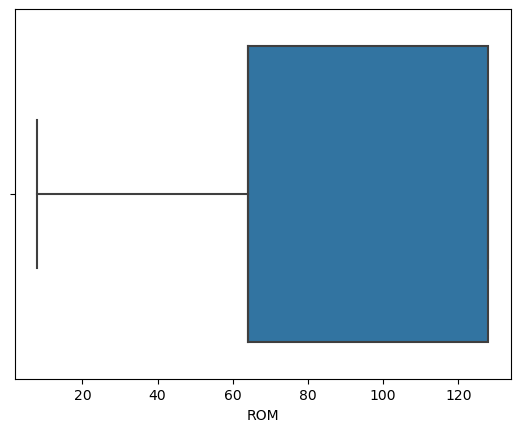

In [458]:
sns.boxplot(data=new_df_cap, x='ROM')

<Axes: xlabel='RAM'>

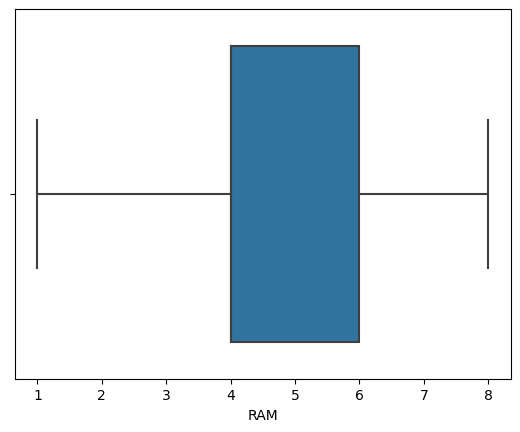

In [459]:
sns.boxplot(data=new_df_cap, x='RAM')

<Axes: xlabel='battery_capacity'>

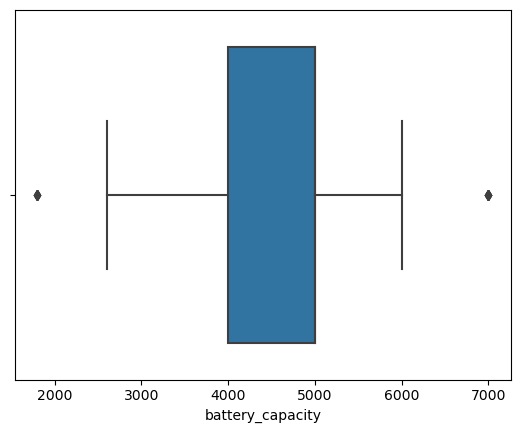

In [460]:
sns.boxplot(data=new_df_cap, x='battery_capacity')

<Axes: xlabel='discount_percent'>

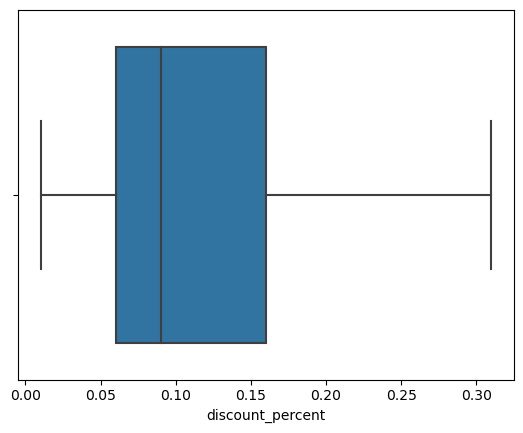

In [461]:
sns.boxplot(data=new_df_cap, x='discount_percent')

In [462]:
new_df_cap = new_df_cap[new_df_cap['battery_capacity'] <= 6000]

In [463]:
new_df_cap = new_df_cap[new_df_cap['discount_percent'] <= 0.25]

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'ROM'),
  Text(1, 0, 'RAM'),
  Text(2, 0, 'num_rear_camera'),
  Text(3, 0, 'num_front_camera'),
  Text(4, 0, 'battery_capacity'),
  Text(5, 0, 'num_of_ratings'),
  Text(6, 0, 'sales_price'),
  Text(7, 0, 'discount_percent')])

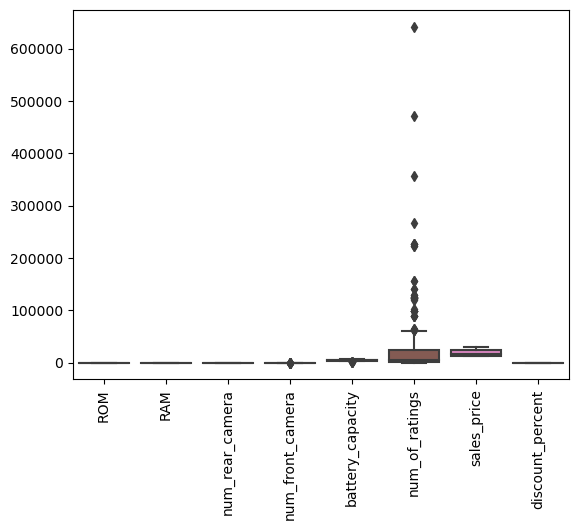

In [464]:
sns.boxplot(new_df_cap)
plt.xticks(rotation =90)

In [465]:
new_df_cap['sales_price'].describe()

count      370.000000
mean     18612.336216
std       6786.767718
min      12348.850000
25%      12348.850000
50%      15999.000000
75%      24161.000000
max      30149.150000
Name: sales_price, dtype: float64

In [466]:
#dummy_brand = pd.get_dummies(data[['brand', 'screen_size', 'base_color', 'processor']])

# Concatenate the dummy variables with the original dataframe
#data1 = pd.concat([data, dummy_brand], axis=1)

# Drop the original columns
#data1.drop(['brand', 'screen_size', 'base_color', 'processor'], axis=1, inplace=True)


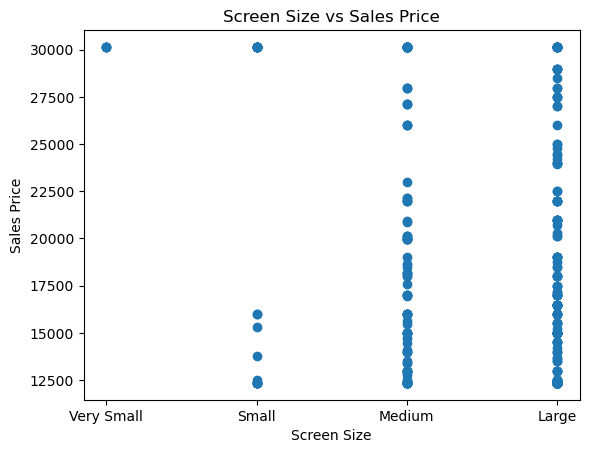

In [467]:
x = new_df_cap['screen_size']
y = new_df_cap['sales_price']

plt.scatter(x, y)
plt.xlabel('Screen Size')
plt.ylabel('Sales Price')
plt.title('Screen Size vs Sales Price')
plt.show()

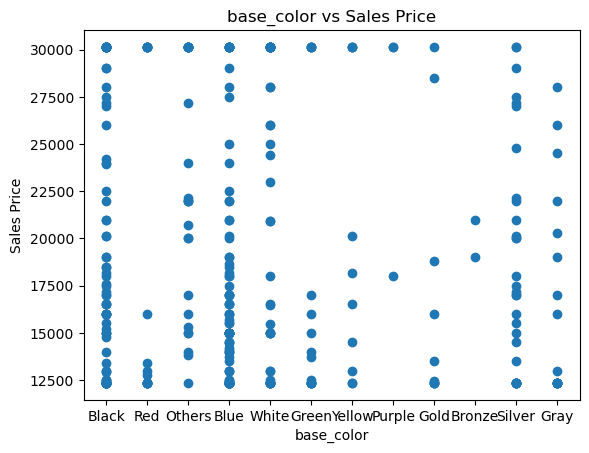

In [468]:
x = new_df_cap['base_color']
y = new_df_cap['sales_price']

plt.scatter(x, y)
plt.xlabel('base_color')
plt.ylabel('Sales Price')
plt.title('base_color vs Sales Price')
plt.show()

In [469]:
data1=new_df_cap.drop(['brand','base_color','processor','screen_size'], axis=1, inplace=True)

In [470]:
new_df_cap

,model,ROM,RAM,num_rear_camera,num_front_camera,battery_capacity,num_of_ratings,sales_price,discount_percent
0,iPhone SE,64,2,1,0.0,1800,38645,30149.15,0.17
1,iPhone 12 Mini,64,4,2,0.0,2815,244,30149.15,0.04
2,iPhone SE,64,2,1,0.0,1800,38645,30149.15,0.17
3,iPhone XR,64,3,1,0.0,2942,5366,30149.15,0.10
4,iPhone 12,128,4,2,0.0,2815,745,30149.15,0.02
...,...,...,...,...,...,...,...,...,...
421,Redmi Note 9 Pro,128,4,2,0.0,5020,6106,14199.00,0.03
422,Redmi Note 9 Pro,128,6,4,0.0,5020,434,14999.00,0.06
424,Redmi 5,16,2,1,0.0,3300,4267,12348.85,0.18
427,Mi 11 Lite,128,6,3,0.0,4250,1554,21999.00,0.12


In [471]:
new_df_cap.drop('model', axis=1, inplace=True)

In [472]:
data1 = new_df_cap.copy()

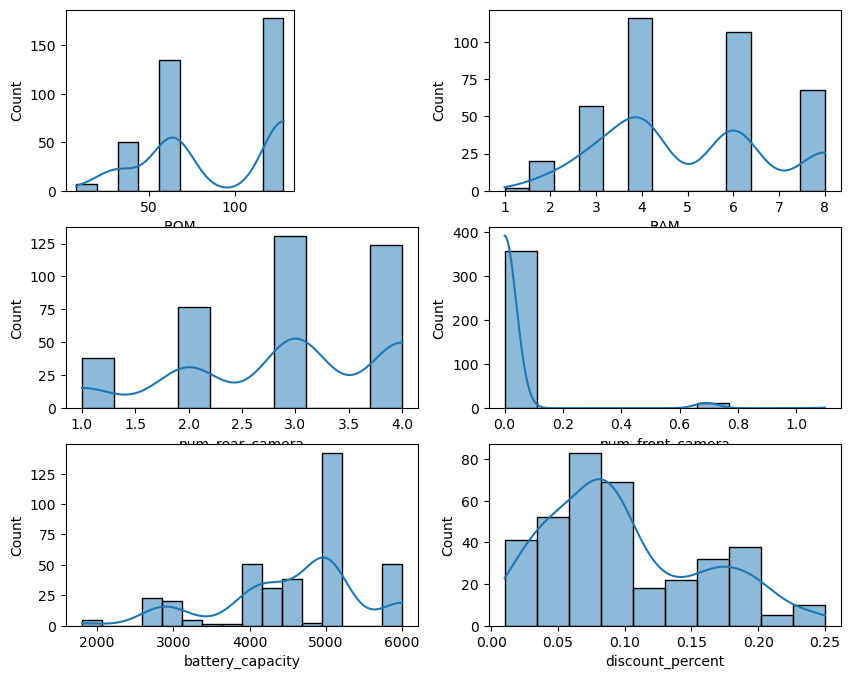

In [473]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

plt.subplot(3, 3, 1)
sns.histplot(data1['ROM'], kde=True)
plt.xlabel('ROM')

plt.subplot(3, 2, 2)
sns.histplot(data1['RAM'], kde=True)
plt.xlabel('RAM')

plt.subplot(3, 2, 3)
sns.histplot(data1['num_rear_camera'], kde=True)
plt.xlabel('num_rear_camera')

plt.subplot(3, 2, 4)
sns.histplot(data1['num_front_camera'], kde=True)
plt.xlabel('num_front_camera')

plt.subplot(3, 2, 5)
sns.histplot(data1['battery_capacity'], kde=True)
plt.xlabel('battery_capacity')

plt.subplot(3, 2, 6)
sns.histplot(data1['discount_percent'], kde=True)
plt.xlabel('discount_percent')

plt.tight_layout()
plt.show()


In [474]:
data1['battery_capacity'].describe()

count     370.000000
mean     4569.056757
std       937.634627
min      1800.000000
25%      4000.000000
50%      5000.000000
75%      5000.000000
max      6000.000000
Name: battery_capacity, dtype: float64

Text(0.5, 0, 'battery_capacity')

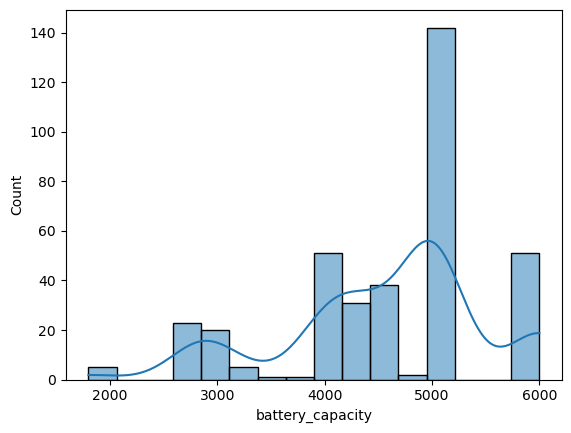

In [475]:
sns.histplot(data1['battery_capacity'], kde=True)
plt.xlabel('battery_capacity')

In [476]:
data1['battery_capacity'].describe()

count     370.000000
mean     4569.056757
std       937.634627
min      1800.000000
25%      4000.000000
50%      5000.000000
75%      5000.000000
max      6000.000000
Name: battery_capacity, dtype: float64

##### Scaling 

In [477]:
scaler = MinMaxScaler()
num_vars = ['ROM','RAM','num_rear_camera','num_front_camera','battery_capacity','discount_percent']
data1[num_vars] = scaler.fit_transform(data1[num_vars])
data1.head()

,ROM,RAM,num_rear_camera,num_front_camera,battery_capacity,num_of_ratings,sales_price,discount_percent
0,0.466667,0.142857,0.000000,0.0,0.000000,38645,30149.15,0.666667
1,0.466667,0.428571,0.333333,0.0,0.241667,244,30149.15,0.125000
2,0.466667,0.142857,0.000000,0.0,0.000000,38645,30149.15,0.666667
3,0.466667,0.285714,0.000000,0.0,0.271905,5366,30149.15,0.375000
4,1.000000,0.428571,0.333333,0.0,0.241667,745,30149.15,0.041667


In [478]:
data1.columns

Index(['ROM', 'RAM', 'num_rear_camera', 'num_front_camera', 'battery_capacity',
       'num_of_ratings', 'sales_price', 'discount_percent'],
      dtype='object')

In [479]:
data1.drop('num_of_ratings',axis=1,inplace=True)

In [480]:
data1

,ROM,RAM,num_rear_camera,num_front_camera,battery_capacity,sales_price,discount_percent
0,0.466667,0.142857,0.000000,0.0,0.000000,30149.15,0.666667
1,0.466667,0.428571,0.333333,0.0,0.241667,30149.15,0.125000
2,0.466667,0.142857,0.000000,0.0,0.000000,30149.15,0.666667
3,0.466667,0.285714,0.000000,0.0,0.271905,30149.15,0.375000
4,1.000000,0.428571,0.333333,0.0,0.241667,30149.15,0.041667
...,...,...,...,...,...,...,...
421,1.000000,0.428571,0.333333,0.0,0.766667,14199.00,0.083333
422,1.000000,0.714286,1.000000,0.0,0.766667,14999.00,0.208333
424,0.066667,0.142857,0.000000,0.0,0.357143,12348.85,0.708333
427,1.000000,0.714286,0.666667,0.0,0.583333,21999.00,0.458333


##### Splitting Data

In [481]:
df_train,df_test = train_test_split (data1,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(259, 7)
(111, 7)


##### Giving X and y

In [482]:
y_train = df_train.pop("sales_price")
X_train = df_train

##### Corelation check

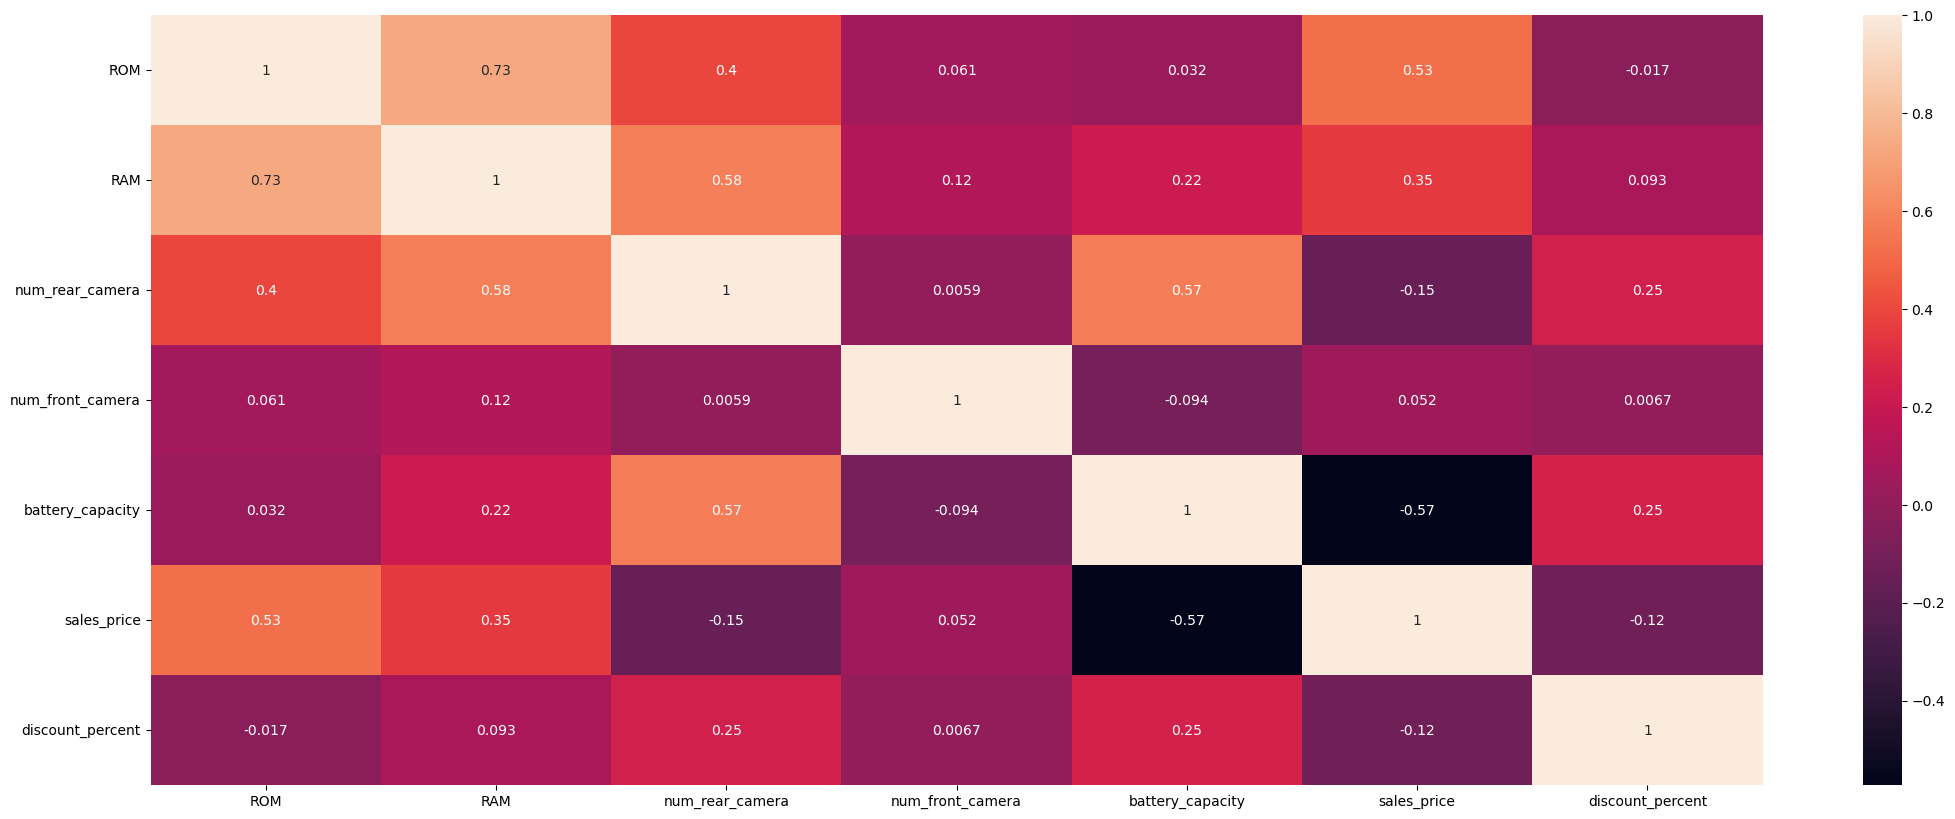

In [483]:
plt.figure(figsize=(26, 10))
sns.heatmap(data1.corr(), annot=True)
plt.show()

##### Statsmodel

###### Adding one by one

In [485]:
X_train_sm = sm.add_constant(X_train['ROM'])
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sales_price   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     106.5
Date:                Tue, 23 May 2023   Prob (F-statistic):           4.12e-21
Time:                        15:07:30   Log-Likelihood:                -2610.1
No. Observations:                 259   AIC:                             5224.
Df Residuals:                     257   BIC:                             5231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.053e+04    873.834     12.049      0.000    8808.463    1.23e+04
ROM         1.174e+04   1137.325     10.319      0.000    9495.891     1.4e+04
==============================================================================
Omnibus:                       25.885   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.964
Skew:                           0.840   Prob(JB):                     1.89e-07
Kurtosis:                       3.218   Cond. No.                         4.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [486]:
X_train_sm =X_train[['ROM','num_rear_camera']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sales_price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     108.3
Date:                Tue, 23 May 2023   Prob (F-statistic):           8.19e-35
Time:                        15:07:30   Log-Likelihood:                -2575.6
No. Observations:                 259   AIC:                             5157.
Df Residuals:                     256   BIC:                             5168.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.449e+04    887.685     16.325      0.000    1.27e+04    1.62e+04
ROM              1.486e+04   1058.229     14.046      0.000    1.28e+04    1.69e+04
num_rear_camera -9374.7419   1060.137     -8.843      0.000   -1.15e+04   -7287.041
==============================================================================
Omnibus:                        4.170   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                4.186
Skew:                           0.309   Prob(JB):                        0.123
Kurtosis:                       2.920   Cond. No.                         5.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [487]:
X_train_sm =X_train[['ROM','num_rear_camera','battery_capacity']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sales_price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     140.5
Date:                Tue, 23 May 2023   Prob (F-statistic):           9.40e-54
Time:                        15:07:30   Log-Likelihood:                -2528.6
No. Observations:                 259   AIC:                             5065.
Df Residuals:                     255   BIC:                             5079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              2.19e+04   1021.555     21.443      0.000    1.99e+04    2.39e+04
ROM               1.222e+04    919.174     13.298      0.000    1.04e+04     1.4e+04
num_rear_camera  -2160.7213   1118.972     -1.931      0.055   -4364.326      42.883
battery_capacity -1.541e+04   1459.883    -10.557      0.000   -1.83e+04   -1.25e+04
==============================================================================
Omnibus:                        6.845   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.157
Skew:                           0.311   Prob(JB):                       0.0460
Kurtosis:                       2.571   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [488]:
X_train_sm =X_train[['ROM','num_rear_camera','battery_capacity','discount_percent']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sales_price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     107.5
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.84e-53
Time:                        15:07:30   Log-Likelihood:                -2526.7
No. Observations:                 259   AIC:                             5063.
Df Residuals:                     254   BIC:                             5081.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.122e+04   1074.047     19.760      0.000    1.91e+04    2.33e+04
ROM               1.249e+04    923.908     13.514      0.000    1.07e+04    1.43e+04
num_rear_camera  -2513.0085   1127.325     -2.229      0.027   -4733.104    -292.913
battery_capacity -1.561e+04   1455.243    -10.724      0.000   -1.85e+04   -1.27e+04
discount_percent  2159.9417   1104.796      1.955      0.052     -15.785    4335.669
==============================================================================
Omnibus:                        3.699   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                3.605
Skew:                           0.242   Prob(JB):                        0.165
Kurtosis:                       2.684   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [489]:
X_train_sm =X_train[['ROM','num_rear_camera','battery_capacity','discount_percent','RAM']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sales_price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     97.81
Date:                Tue, 23 May 2023   Prob (F-statistic):           4.48e-57
Time:                        15:07:30   Log-Likelihood:                -2515.6
No. Observations:                 259   AIC:                             5043.
Df Residuals:                     253   BIC:                             5065.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.099e+04   1032.392     20.332      0.000     1.9e+04     2.3e+04
ROM               8926.2293   1161.479      7.685      0.000    6638.831    1.12e+04
num_rear_camera  -4253.4653   1142.794     -3.722      0.000   -6504.066   -2002.865
battery_capacity  -1.59e+04   1398.595    -11.368      0.000   -1.87e+04   -1.31e+04
discount_percent  1764.7589   1064.009      1.659      0.098    -330.685    3860.203
RAM               7207.0029   1518.254      4.747      0.000    4216.977    1.02e+04
==============================================================================
Omnibus:                        1.507   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.473
Skew:                           0.098   Prob(JB):                        0.479
Kurtosis:                       2.687   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [490]:
X_train_sm =X_train[['ROM','num_rear_camera','battery_capacity','discount_percent','RAM','num_front_camera']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sales_price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     82.10
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.86e-56
Time:                        15:07:30   Log-Likelihood:                -2514.7
No. Observations:                 259   AIC:                             5043.
Df Residuals:                     252   BIC:                             5068.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.108e+04   1032.791     20.412      0.000     1.9e+04    2.31e+04
ROM               8860.2821   1160.502      7.635      0.000    6574.764    1.11e+04
num_rear_camera  -4234.1556   1140.931     -3.711      0.000   -6481.131   -1987.181
battery_capacity -1.614e+04   1407.443    -11.469      0.000   -1.89e+04   -1.34e+04
discount_percent  1813.9813   1062.805      1.707      0.089    -279.130    3907.093
RAM               7463.1095   1527.217      4.887      0.000    4455.374    1.05e+04
num_front_camera -2795.5335   2046.675     -1.366      0.173   -6826.300    1235.233
==============================================================================
Omnibus:                        1.985   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.790
Skew:                           0.099   Prob(JB):                        0.409
Kurtosis:                       2.644   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Predicting

In [491]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

31     28054.895690
210     9096.973060
46     28289.929460
213    16909.983401
50     23640.028253
           ...     
397    19228.534980
414    21360.676284
377    22222.912084
318    13444.719740
8      27903.730578
Length: 259, dtype: float64

##### Residual Analysis

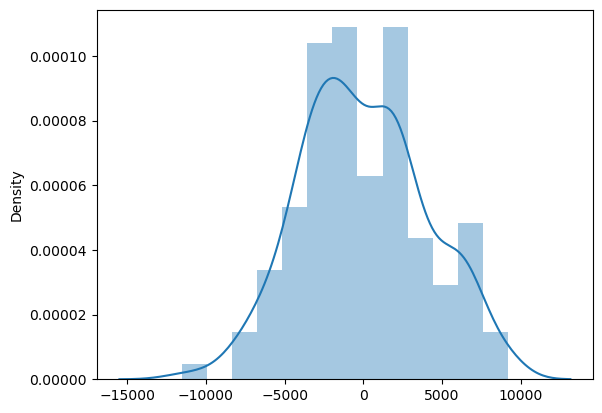

In [492]:
res = y_train-y_train_pred
sns.distplot(res)
plt.show()

##### Creating Test data

In [493]:
y_test = df_test.pop('sales_price')
X_test = df_test

In [494]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,ROM,RAM,num_rear_camera,num_front_camera,battery_capacity,discount_percent
398,1.0,1.000000,0.714286,0.333333,0.00000,0.523810,0.000000
411,1.0,0.466667,0.714286,0.333333,0.63093,0.523810,0.333333
347,1.0,1.000000,0.714286,1.000000,0.00000,1.000000,0.208333
167,1.0,1.000000,1.000000,0.666667,0.00000,0.595238,0.208333
305,1.0,0.200000,0.285714,0.666667,0.00000,0.761905,0.333333


In [495]:
y_test_pred = lr_model.predict(X_test_sm)

In [496]:
y_test_pred

398    25446.218112
411    20933.384660
347    17656.290990
167    18806.442811
305    15637.023952
           ...     
243    18897.255668
230    15223.855862
170    20365.643248
396    26961.744411
23     19708.349504
Length: 111, dtype: float64